# Demes Tutorial

## Outline
1. Basics of using Jupyter Notebooks
2. Demes Overview
3. Installation
4. YAML file and Example
5. Drawing using ``demesdraw``
6. One Population Example
7. Multiple Populations
8. Migration and Pulses
9. Hands on!

-----
# 1. Basics of using Jupyter Notebooks

Jupyter Notebooks consist of cells where you can write Markdown or execute code. To run a cell, either click the "Run" button or press `Shift` + `Enter`.

In [1]:
print('Try writing some Python here')

Try writing some Python here


In [2]:
%%bash
echo 'We can also use Bash magic. Try writing some Bash here'

We can also use Bash magic. Try writing some Bash here


To display pictures or plots within this notebook, include the following magic command:

In [3]:
%matplotlib inline

-----
## 2. Demes Overview

The tool ``demes`` is used to provide a standardised specification for demographic histories.
By using ``demes``, researchers can ensure the consistent representation of demographic histories, enhancing reproducibility and interoperability across various tools and studies.

When we talk about ``demes``:
* [demes-python](https://github.com/popsim-consortium/demes-python/) - a Python library for loading, saving, and working with ``demes`` histories.
* [demesdraw](https://github.com/grahamgower/demesdraw) - a Python library for drawing ``demes`` histories.


**Citation:**\
Graham Gower, Aaron P Ragsdale, Gertjan Bisschop, Ryan N Gutenkunst, Matthew Hartfield, Ekaterina Noskova, Stephan Schiffels, Travis J Struck, Jerome Kelleher, Kevin R Thornton, Demes: a standard format for demographic models, Genetics, Volume 222, Issue 3, November 2022, iyac131, [https://doi.org/10.1093/genetics/iyac131](https://doi.org/10.1093/genetics/iyac131)

**Tutorial**\
There is a [tutorial](https://popsim-consortium.github.io/demes-spec-docs/main/tutorial.html) in the documentation of ``demes``. This tutorial uses examples from it.

## 3. Installation

In [4]:
%%bash
pip install "matplotlib<=3.7.5"
pip install demes demesdraw

In [5]:
import demes
import demesdraw

## 4. YAML file and Example

``demes`` use YAML files for history specification. A YAML file consists of `property: value pairs`. YAML files typically use the `.yaml` or `.yml` extension. 



### Example

Let us look at an example file `examples/example1.yaml` with demographic history specification:

In [6]:
%%bash
cat examples/example1.yaml

# Comments start with a hash.
# This is example 1 from the demes tutorial https://popsim-consortium.github.io/demes-spec-docs/main/tutorial.html
description:
  Asymmetric migration between two extant demes.
time_units: generations
defaults:
  epoch:
    start_size: 5000
demes:
  - name: X
    epochs:
      - end_time: 1000
  - name: A
    ancestors: [X]
  - name: B
    ancestors: [X]
    epochs:
      - start_size: 2000
        end_time: 500
      - start_size: 400
        end_size: 10000
migrations:
  - source: A
    dest: B
    rate: 1e-4


## 5. Drawing using ``demesdraw``

In order to draw ``demes`` history, we should use ``demesdraw``.

### Command line
``demesdraw`` can be launched from command line:

In [7]:
%%bash
demesdraw --help

usage: demesdraw [-h] [--version] {tubes,size_history} ...

Draw a Demes model.

positional arguments:
  {tubes,size_history}
    tubes               Plot a demes-as-tubes schematic of the model and the
                        demes' relationships.
    size_history        Plot population size as a function of time for each
                        deme in the model.

options:
  -h, --help            show this help message and exit
  --version             show program's version number and exit


We recommend using `tubes` option:

In [8]:
%%bash
demesdraw tubes --help

usage: demesdraw tubes [-h] [--log-time] [--aspect ASPECT] [--scale SCALE]
                       [--title TITLE] [--scale-bar]
                       model.yaml [figure.img]

Plot a demes-as-tubes schematic of the model and the demes' relationships.

positional arguments:
  model.yaml       Filename of the model. The special value '-' may be used to
                   read from stdin. The file may be in any format supported by
                   the demes library.
  figure.img       The filename for the image. The file extension determines
                   the filetype, and can be any format supported by Matplotlib
                   (e.g. pdf, svg, png). If no file is specified, an
                   interactive plot window will be opened.

options:
  -h, --help       show this help message and exit
  --log-time       Use a log-10 scale for the time axis.
  --aspect ASPECT  Set the aspect ratio (height/width) of the plot.
  --scale SCALE    Scale the figure size by the given value.

Draw the example history and save picture as `pictures/example1.png`

In [6]:
%%bash
demesdraw tubes --scale 0.5 examples/example1.yaml pictures/example1.png

The result (file `pictures/example1.png`):

![example1.png](pictures/example1.png)

### Python API

We can use ``demesdraw`` using Python API. It provides additional control, see more about it [here](https://github.com/grahamgower/demesdraw?tab=readme-ov-file#python-api).

<AxesSubplot:ylabel='time ago (generations)'>

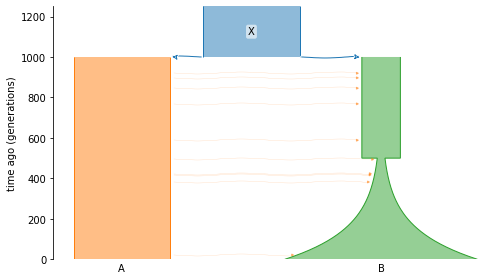

In [8]:
import demes
import demesdraw

graph = demes.load("examples/example1.yaml")
demesdraw.tubes(graph)

## 6. One Population Example

We will start our tutorial with one population example.

We will use several definitions:
* A **deme** — a collection of individuals that share a set of population parameters at any given time.
* An **epoch** — a time interval in the history of deme, that has fixed population parameters.

A deme always has at least one epoch. The population parameters for a deme are allowed to change over time, but are fixed within an epoch. 

Let us consider the population that had a constant population size of 1000 individuals and experienced a bottleneck 50 generations ago.

In [11]:
%%bash
cat examples/example4.yaml

# This is example 4 from the demes tutorial https://popsim-consortium.github.io/demes-spec-docs/main/tutorial.html
time_units: generations
demes:
  - name: B
    start_time: .inf
    epochs:
      - start_size: 1000
        end_time: 50
      - start_size: 200
        end_time: 0


Alternatively, we can remove the `end_time: 0` for the last epoch:

In [12]:
%%bash
cat examples/example5.yaml

# This is example 5 from the demes tutorial https://popsim-consortium.github.io/demes-spec-docs/main/tutorial.html
time_units: generations
demes:
  - name: B
    start_time: .inf
    epochs:
      - start_size: 1000
        end_time: 50
      - start_size: 200


<AxesSubplot:ylabel='time ago (generations)'>

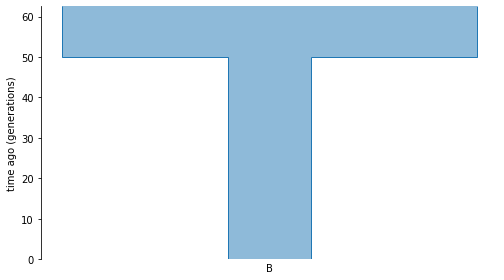

In [9]:
graph = demes.load("examples/example5.yaml")
demesdraw.tubes(graph)

### Why don't epochs have `start_time`?
We can skip specification of `start_time` for epochs: it is evaluated automatically from the order of epochs.

## Exponential size changes

To specify an exponential size change, set the `start_size` and `end_size` for the epoch. If the `start_size` and `end_size` are equal, the population size remains constant. Otherwise, the epoch is defined by an exponentially changing population size over the time interval.

In [14]:
%%bash
cat examples/exponential_size_change.yaml

description: A demographic history of a single population with exponential increase of population size
time_units: generations
demes:
  - name: Population
    epochs:
      - end_time: 4000
        start_size: 6000
      - end_time: 2000
        start_size: 6000
        end_size: 1000
      - end_time: 0
        start_size: 100
        end_size: 2000


<AxesSubplot:ylabel='time ago (generations)'>

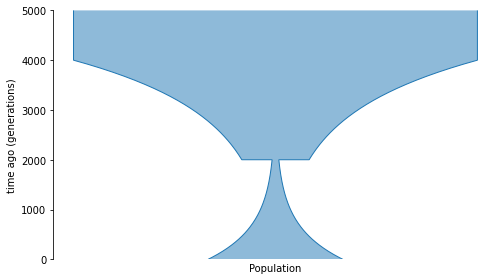

In [10]:
graph = demes.load("examples/exponential_size_change.yaml")
demesdraw.tubes(graph)

## 7. Multiple Populations

We can have multiple populations in the demographic history.

### Population Split

Assume we have two populations `Populaion1` and `Population2` that were formed by split event of ancestral population `Ancestral`. We need to specify three demes:

In [16]:
%%bash
cat examples/population_split.yaml

time_units: generations
demes:
  - name: Ancestral
    epochs:
      - end_time: 2000
        start_size: 10000
  - name: Population1
    ancestors:
      - Ancestral
    epochs:
      - start_size: 8000
  - name: Population2
    ancestors:
      - Ancestral
    epochs:
      - start_size: 2000


<AxesSubplot:ylabel='time ago (generations)'>

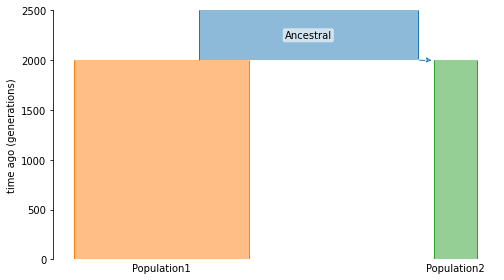

In [11]:
graph = demes.load("examples/population_split.yaml")
demesdraw.tubes(graph)

### A branch event

A split event can be represented as a branching event, where a newly formed population diverges from an ancestral population that continues to exist. In that case we need to specify `start_time` for the population — time of population divergence.

In [18]:
%%bash
cat examples/branch_event.yaml

time_units: generations
demes:
  - name: Population1
    epochs:
      - end_time: 2000
        start_size: 10000
      - start_size: 8000
  - name: Population2
    ancestors:
      - Population1
    start_time: 2000
    epochs:
      - start_size: 2000


<AxesSubplot:ylabel='time ago (generations)'>

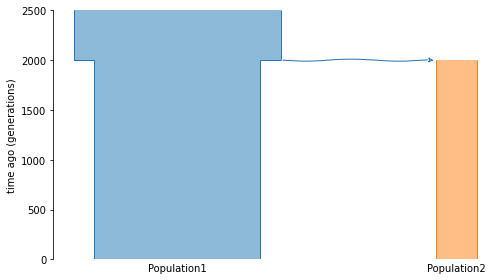

In [12]:
graph = demes.load("examples/branch_event.yaml")
demesdraw.tubes(graph)

## 8. Migration and Pulses

``demes`` allows adding continuous migrations and pulse events (admixture).

### Continuous Migrations

Continuous migrations are specified at the end of `yaml` file using the following template:
```yaml
migrations:
  - source: <Source population name>
    dest: <Destination population name>
    rate: <Rate of Migration per generation>
    start_time: <Time when mutation started>
    end_time: <Time when mutation stopped>
```

If no `start_time` and `end_time` are specified, the migration will, by default, occur over the period when both demes exist simultaneously.

In order to specify symmetric migration, use `demes` property instead `source` and `dest`.

In [20]:
%%bash
cat examples/migration.yaml

time_units: generations
demes:
  - name: Population1
    epochs:
      - end_time: 2000
        start_size: 10000
      - start_size: 8000
  - name: Population2
    ancestors:
      - Population1
    start_time: 2000
    epochs:
      - start_size: 2000
  - name: Population3
    epochs:
      - end_time: 1700
        start_size: 5000
      - start_size: 5000
        end_size: 10000
migrations:
  - source: Population2
    dest: Population3
    rate: 1e-5
  - demes: [Population1, Population3]
    rate: 1e-10
    start_time: 1000
    end_time: 500


<AxesSubplot:ylabel='time ago (generations)'>

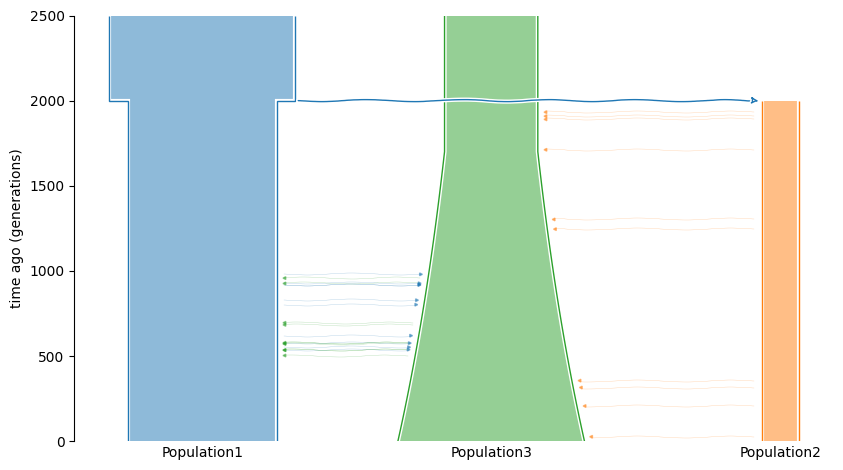

In [21]:
graph = demes.load("examples/migration.yaml")
demesdraw.tubes(graph)

### Pulse Events

Pulses are specified similar to migrations using `pulses` section:
```yaml
pulses:
  - sources: <List of populations names>
    dest: <Destination population name>
    proportions: <List of proportions>
    time: <Time of pulse event>
```

In [22]:
%%bash
cat examples/pulse.yaml

time_units: generations
demes:
  - name: Population1
    epochs:
      - end_time: 2000
        start_size: 10000
      - start_size: 8000
  - name: Population2
    ancestors:
      - Population1
    start_time: 2000
    epochs:
      - start_size: 2000
  - name: Population3
    epochs:
      - end_time: 1700
        start_size: 5000
      - start_size: 5000
        end_size: 10000
migrations:
  - source: Population2
    dest: Population3
    rate: 1e-5
  - demes: [Population1, Population3]
    rate: 1e-10
    start_time: 1000
    end_time: 500
pulses:
  - sources: [Population1, Population2]
    dest: Population3
    proportions: [0.1, 0.01]
    time: 1700


<AxesSubplot:ylabel='time ago (generations)'>

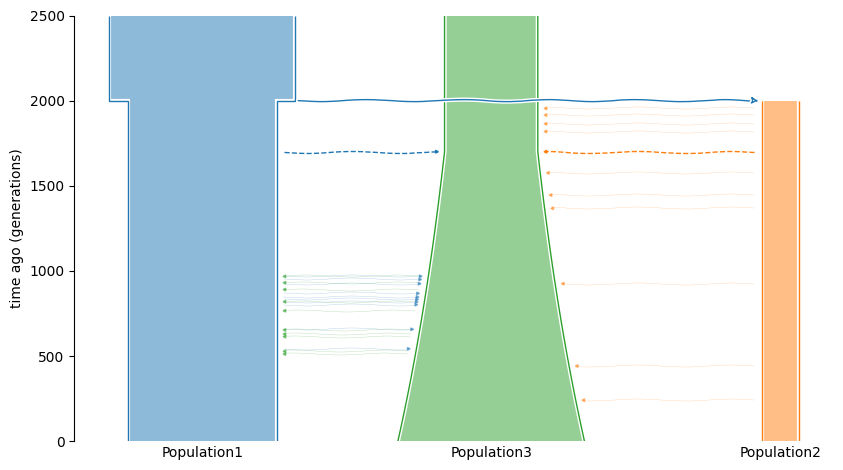

In [23]:
graph = demes.load("examples/pulse.yaml")
demesdraw.tubes(graph)

-----
## 9. Hands on!

Now it’s time to apply what you’ve learned! We suggest that you build a demes model based on the diagram below.

![pictures/task/history_final.png](pictures/task/history_final.png)

### Step1: Create Population1

Create demographic history of `Population1`. Do not include events before ancestral population split. demograhpic parameters you can find on the picture:

![pictures/task/step1.png](pictures/task/step1.png)

### Step2: Add Population2

![pictures/task/step2.png](pictures/task/step2.png)

### Step3: Add Ancestral Population

![pictures/task/step3.png](pictures/task/step3.png)

### Step4: Add Pulse Event

![pictures/task/step4.png](pictures/task/step4.png)

### Step5: Add Asymmetric Migrations

![pictures/task/step5.png](pictures/task/step5.png)